

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


### get url

In [1]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'
startdate = "'2016-12-09'"
url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-09'


In [2]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Set Display Column with wider so no problem with Media URL series

In [136]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [137]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [138]:
df = pd.read_csv(url)

In [139]:
df.shape

(108, 16)

#### Does the shape make sense  ??

In [140]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6613343,12/09/2016 08:05:46 PM,NaN,12/09/2016 08:05:46 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,Intersection of 4TH AVE and BALBOA ST,1,Inner Richmond,"(37.7773318868498, -122.461868072166)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7f0a3da19793c74c75c7/report.jpg
1,6613328,12/09/2016 07:56:57 PM,12/09/2016 08:43:35 PM,12/09/2016 08:43:35 PM,Closed,Case is a Duplicate -,311 Supervisor Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"945 GENEVA AVE, SAN FRANCISCO, CA, 94112",11,Excelsior,"(37.716261032502, -122.440268419619)",Voice In,NaN
2,6613323,12/09/2016 07:52:11 PM,NaN,12/09/2016 07:53:54 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"952 GENEVA AVE, SAN FRANCISCO, CA, 94112",11,Crocker Amazon,"(37.715905876824, -122.440384184241)",Voice In,NaN


In [141]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [142]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6613343,2016-12-09 20:05:46,NaT,2016-12-09 20:05:46,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,Intersection of 4TH AVE and BALBOA ST,1,Inner Richmond,"(37.7773318868498, -122.461868072166)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7f0a3da19793c74c75c7/report.jpg
1,6613328,2016-12-09 19:56:57,2016-12-09 20:43:35,2016-12-09 20:43:35,Closed,Case is a Duplicate -,311 Supervisor Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"945 GENEVA AVE, SAN FRANCISCO, CA, 94112",11,Excelsior,"(37.716261032502, -122.440268419619)",Voice In,NaN
2,6613323,2016-12-09 19:52:11,NaT,2016-12-09 19:53:54,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"952 GENEVA AVE, SAN FRANCISCO, CA, 94112",11,Crocker Amazon,"(37.715905876824, -122.440384184241)",Voice In,NaN


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=9.0, right=9.0
  'left=%s, right=%s') % (left, right))


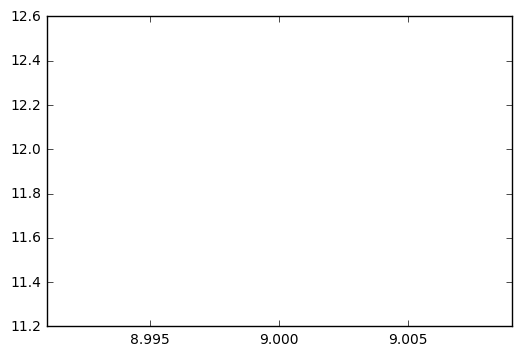

In [143]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=9.0, right=9.0
  'left=%s, right=%s') % (left, right))


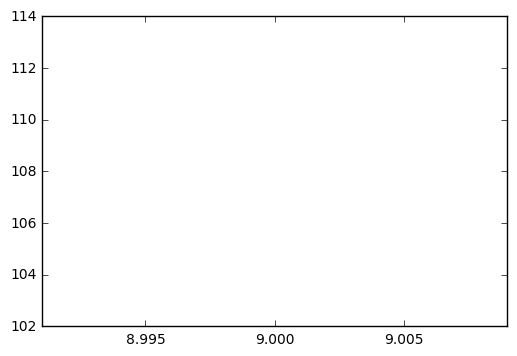

In [144]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4.0, right=4.0
  'left=%s, right=%s') % (left, right))


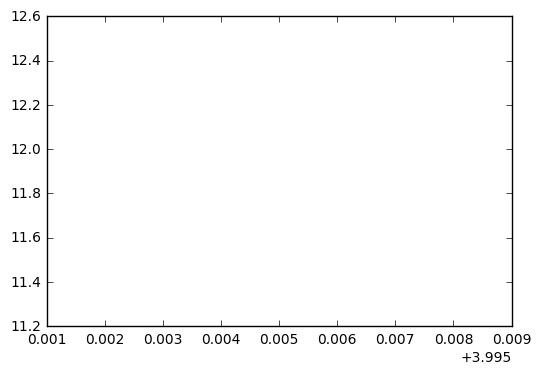

In [145]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [146]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [147]:

df['Request Details'].value_counts()


Building_commercial - Not_Offensive                 17
Building_commercial - Offensive                     10
Pole - Not_Offensive                                10
Signal_box - Not_Offensive                           9
Transit_Shelter_Platform - Not_Offensive             8
City_receptacle - Not_Offensive                      7
Mail_box - Not_Offensive                             6
Mail_box - Offensive                                 6
Building_residential - Not_Offensive                 5
Parking_meter - Not_Offensive                        5
Signal_box - Offensive                               3
Sidewalk_structure - Not_Offensive                   3
Other_enter_additional_details_below - Offensive     3
Fire_hydrant - Not_Offensive                         3
Fire_hydrant - Offensive                             2
Building_other - Offensive                           2
Sidewalk_in_front_of_property - Not_Offensive        2
Street - Offensive                                   2
Pole - Off

In [148]:
df['Supervisor District'].value_counts().sort_index()



-1      1
 1      3
 2      3
 3     25
 4      1
 5      7
 6     21
 7      1
 8     10
 9     26
 10     7
 11     3
Name: Supervisor District, dtype: int64

In [149]:
df.Neighborhood.value_counts()

Mission                     19
Chinatown                   19
Tenderloin                  11
Potrero Hill                 8
Civic Center                 7
Mission Dolores              5
Nob Hill                     5
Bernal Heights               3
South of Market              3
Mint Hill                    3
Lower Haight                 3
Inner Richmond               2
Lower Nob Hill               2
Duboce Triangle              2
Crocker Amazon               1
Upper Market                 1
Rincon Hill                  1
Outer Mission                1
Parkmerced                   1
Outer Sunset                 1
Excelsior                    1
Outer Richmond               1
Cathedral Hill               1
South Beach                  1
Aquatic Park / Ft. Mason     1
Marina                       1
Holly Park                   1
Financial District           1
Apparel City                 1
Name: Neighborhood, dtype: int64

In [150]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
10,6612843,2016-12-09 16:22:18,NaT,2016-12-09 17:06:24,Open,open,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,Intersection of 16TH ST and CALEDONIA ST,9,Mission,"(37.7649478070053, -122.421381595319)",Open311,NaN
27,6612264,2016-12-09 14:29:40,NaT,2016-12-09 14:29:40,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Mail_box - Offensive,Intersection of 18TH ST and MISSION ST,9,Mission,"(37.7618358043403, -122.419359315196)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584b30473da19793c74c6bf6/photo_20161209_142837.jpg
57,6611030,2016-12-09 10:10:13,NaT,2016-12-09 10:58:57,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"577 VALENCIA ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.763689095375, -122.421587605718)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584af3743da19793c74c61b5/report.jpg
60,6611008,2016-12-09 10:04:42,NaT,2016-12-09 10:58:53,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"3016 16TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765138960266, -122.420042041081)",Voice In,NaN
75,6610830,2016-12-09 09:37:06,NaT,2016-12-09 10:01:06,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Pole - Offensive,Intersection of BAY SHORE BLVD ON RAMP and HWY 101 S ON RAMP,9,Mission,"(37.7498544021639, -122.405623813695)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584aebb43da19793c74c5f39/photo_20161209_093611.jpg
80,6610733,2016-12-09 09:22:21,NaT,2016-12-09 10:26:21,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"240 SHOTWELL ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.764751154394, -122.416438535593)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584ae83e3da19793c74c5db4/report.jpg
81,6610699,2016-12-09 09:18:54,NaT,2016-12-09 10:12:50,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"2000 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.765099046216, -122.415615517012)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584ae76d3da19793c74c5ce3/report.jpg
89,6610469,2016-12-09 08:40:46,NaT,2016-12-09 08:40:46,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 19TH ST and LEXINGTON ST,9,Mission,"(37.7601475157402, -122.420659554429)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584ade833da19793c74c5a9d/photo_20161209_084030.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [151]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [152]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:3])


0                   http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7f0a3da19793c74c75c7/report.jpg
1                   http://mobile311.sfgov.org/media/san_francisco/report/photos/584b53373da19793c74c7310/report.jpg
2    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b502a3da19793c74c72a4/photo_20161209_164442.jpg
Name: Media URL, dtype: object


In [153]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7f0a3da19793c74c75c7/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7f0a3da19793c74c75c7/report.jpg


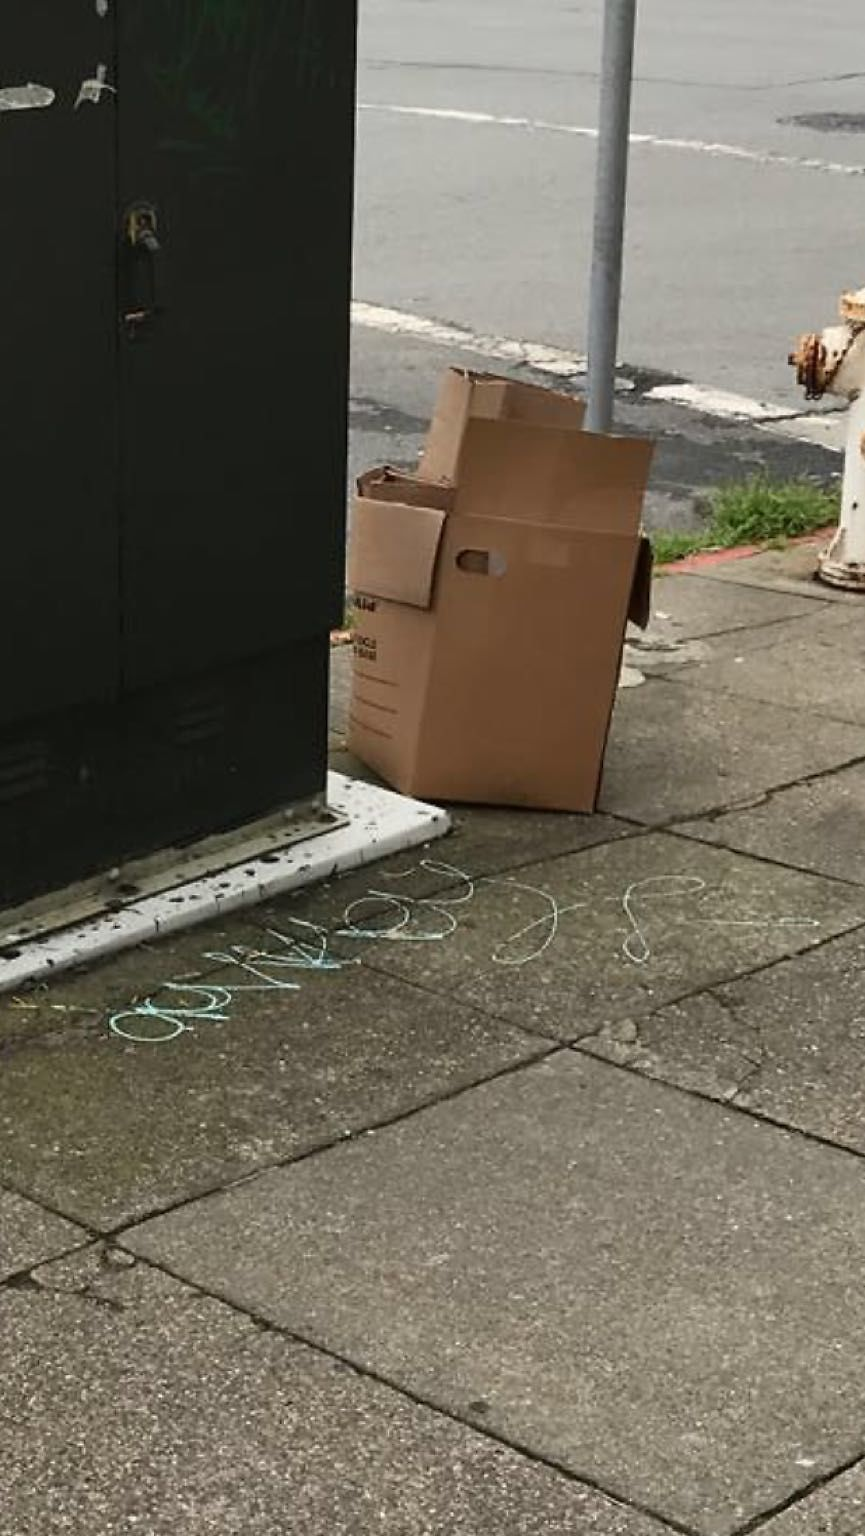

In [154]:
print(images[0])
Image(images[0])


In [155]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [156]:
images[:180].to_csv("./imagelist.txt", index=False)

In [157]:
'''
I had problems when running this code from within the notebook
but it worked outside of the notebook.  Might be delays, might be I wasn't 
careful enough.   But for now, use the other code
%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..
'''

'\nI had problems when running this code from within the notebook\nbut it worked outside of the notebook.  Might be delays, might be I wasn\'t \ncareful enough.   But for now, use the other code\n%cd assets/\n!wget -i ../imagelist.txt\n\n!sleep 30\n#%ls | gawk \'BEGIN{ a=1 }{ printf "mv "%s" %04d.jpg\n", $0, a++ }\' | bash\n#!sleep 10\n#!convert -delay 50 *.jpg out.mp4\n%cd ..\n'

In [158]:
#!convert -delay 50 *.jpg out.mp4
'''
was getting better results with a script outside of the notebook that used ffmpeg
'''


'\nwas getting better results with a script outside of the notebook that used ffmpeg\n'

In [129]:
!ls


San+Fran +Graffiti pull one day.ipynb	 assets		pipevid.sh
San+Francisco+Graffiti with Video.ipynb  imagelist.txt


In [131]:
%cat imagelist.txt | head
%cat imagelist.txt | wc -l

http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65fd3da19793c74c55aa/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/584a65b83da19793c74c55a0/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/584a589b3da19793c74c5557/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/584a58413da19793c74c554b/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/584a28633da19793c74c531e/photo_20161208_194332.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/584a0eb53da19793c74c51d0/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/584a0e273da19793c74c51c1/Graffiti_Fillmore.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/584a0da53da19793c74c5190/Parking_Sign_on_Fillmore.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/584a0cb03da19793c74c517f/1600_Geary_Awning_1.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/584a04f63

In [28]:
Image('report2.jpg')